In [1]:
import numpy as np
import pandas as pd
import glacierml as gl
import matplotlib.pyplot as plt


2024-03-25 17:48:13.124904: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 17:48:13.168611: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 17:48:13.736269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Let's take a look at the variances we calculated in vol_confidence_interval.ipynb

In [2]:
cols = []
for i in range(273):
    cols.append(i)
df = pd.read_pickle('/data/fast1/glacierml/data/final_df.pkl')
E_H = np.mean(df[cols],axis = 1)
E_A = df['Area']
var_eps_H = df['var_eps_H']
var_eps_R = df['var_eps_R']
var_eps_M = df['var_eps_M']
var_H = df['var_H']
var_A = df['var_A']
v1 = (var_H * var_A)
v2 = (var_H * E_A**2) 
v3 = (E_H**2 * var_A)
sigma_k_ind = v1 + v2 + v3 

Text(0.5, 1.0, 'Global Glacier Volume Variance Components')

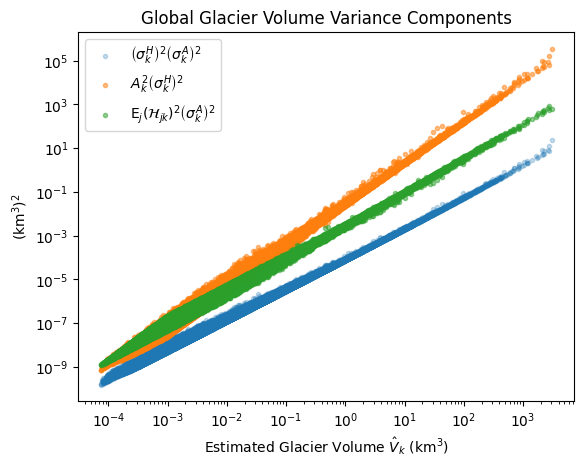

In [3]:
plt.scatter(E_H*E_A,v1,alpha = 0.25,
            label = r'$\left(\sigma^H_k\right)^2\left(\sigma^A_k\right)^2$',
            marker = '.'
           )
plt.scatter(
    E_H*E_A,v2,alpha = 0.5,
    label = r'$A_k^2\left(\sigma^{H}_k\right)^2$',
    marker = '.'
)
plt.scatter(
    E_H*E_A,v3,alpha = 0.5,
    label = r'E$_j\left(\mathcal{H}_{jk}\right)^2\left(\sigma^A_k\right)^2$',
    marker = '.'
)
# plt.scatter(
#     df['Area'],df['Area']*np.mean(df[cols]/1e3,axis = 1),marker = '.',alpha = 0.5,
#     label = 'h*A'
# )
# plt.scatter(df['Area'],np.sqrt(v1+v2+v3),alpha = 0.15,marker = '.',
#            label = r'$\sqrt{\sum}$')
plt.xlabel('Estimated Glacier Volume $\hat{V}_k$ (km$^3$)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('(km$^3$)$^2$')
plt.legend()
plt.title('Global Glacier Volume Variance Components')


<Axes: ylabel='Contribution'>

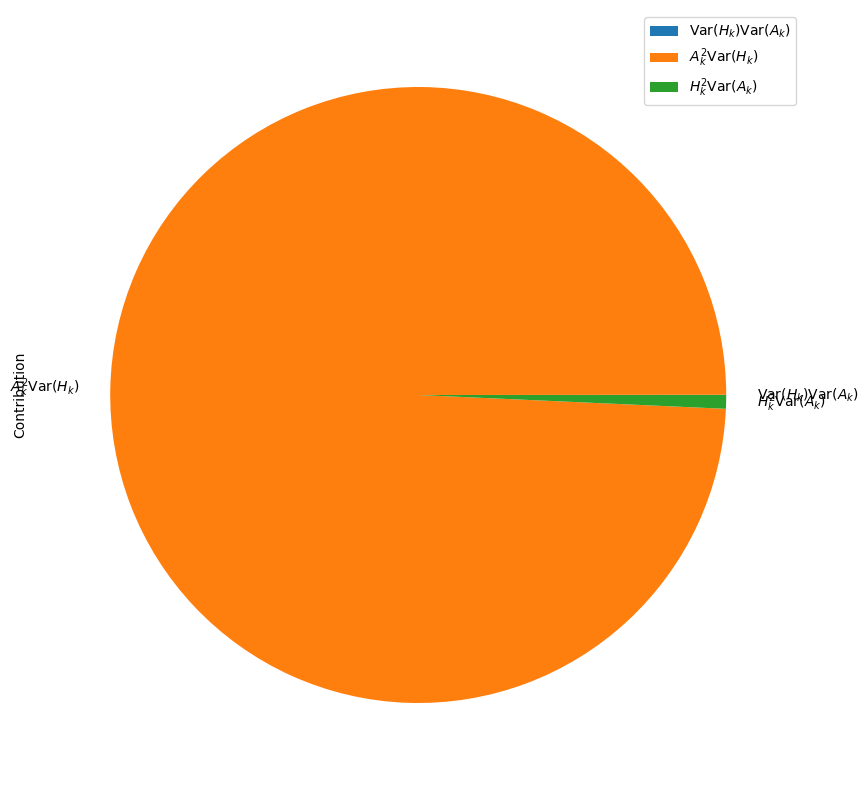

In [4]:
data = [[r'Var$\left(H_k\right)$Var$\left(A_k\right)$', np.sum(v1)], 
        [r'$A^2_k$Var$\left(H_k\right)$',np.sum(v2)], 
        [r'$H^2_k$Var$\left(A_k\right)$', np.sum(v3)]]
data = pd.DataFrame(data, columns=['Name', 'Contribution'],index = [
    r'Var$\left(H_k\right)$Var$\left(A_k\right)$',
    r'$A^2_k$Var$\left(H_k\right)$',
    r'$H^2_k$Var$\left(A_k\right)$'
])

data.plot.pie(y = 'Contribution',figsize=(13, 10))

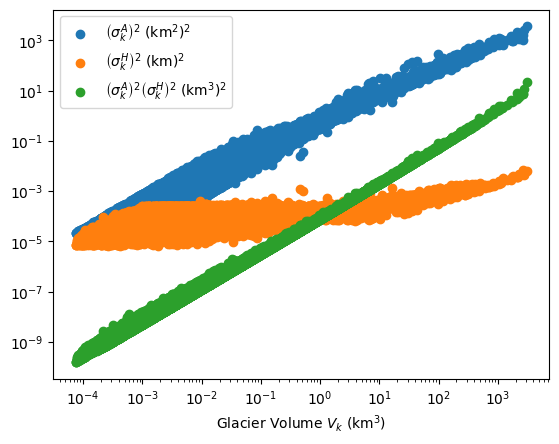

In [5]:

plt.scatter(E_H*E_A,var_A,label = r'$\left(\sigma^A_k\right)^2$ (km$^2$)$^2$')
plt.scatter(E_H*E_A,var_H,label = r'$\left(\sigma^H_k\right)^2$ (km)$^2$')
plt.scatter(E_H*E_A,(var_H*var_A),
            label = r'$\left(\sigma^A_k\right)^2\left(\sigma^H_k\right)^2$ (km$^3$)$^2$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Glacier Volume $V_k$ (km$^3$)')
# plt.ylabel('(km$^3$)$^2$')
plt.legend()
plt.show()



<Axes: ylabel='Contribution'>

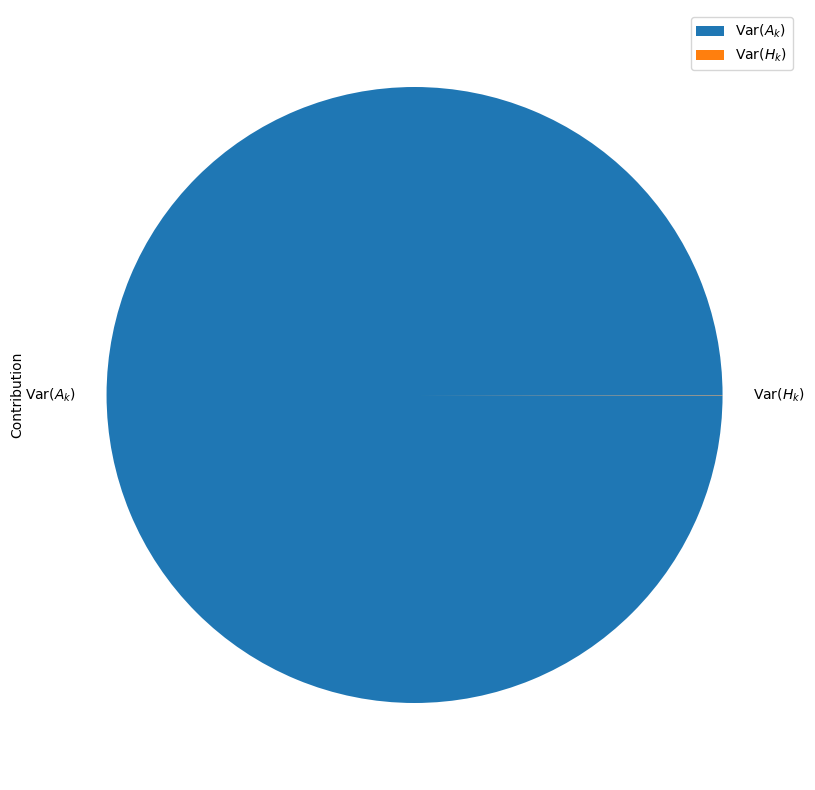

In [6]:
data = [[r'Var$\left(A_k\right)$', np.sum(var_A)], 
        [r'Var$\left(H_k\right)$',np.sum(var_H)], ]
data = pd.DataFrame(data, columns=['Name', 'Contribution'],index = [
    r'Var$\left(A_k\right)$',
    r'Var$\left(H_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
])

data.plot.pie(y = 'Contribution',figsize=(13, 10))

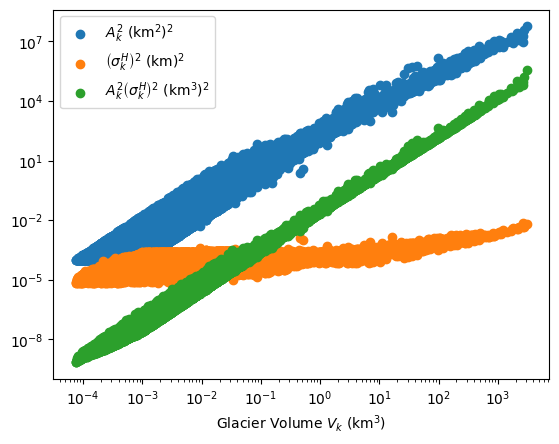

In [7]:
plt.scatter(E_H*E_A,df['Area']**2,label = '$A^2_k$ (km$^2$)$^2$')
plt.scatter(E_H*E_A,var_H,label = r'$\left(\sigma^H_k\right)^2$ (km)$^2$')
plt.scatter(E_H*E_A,(var_H*df['Area']**2),
            label = r'$A_k^2\left(\sigma^H_k\right)^2$ (km$^3$)$^2$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Glacier Volume $V_k$ (km$^3$)')
# plt.ylabel('(km$^3$)$^2$')
plt.legend()
plt.show()



<Axes: ylabel='Contribution'>

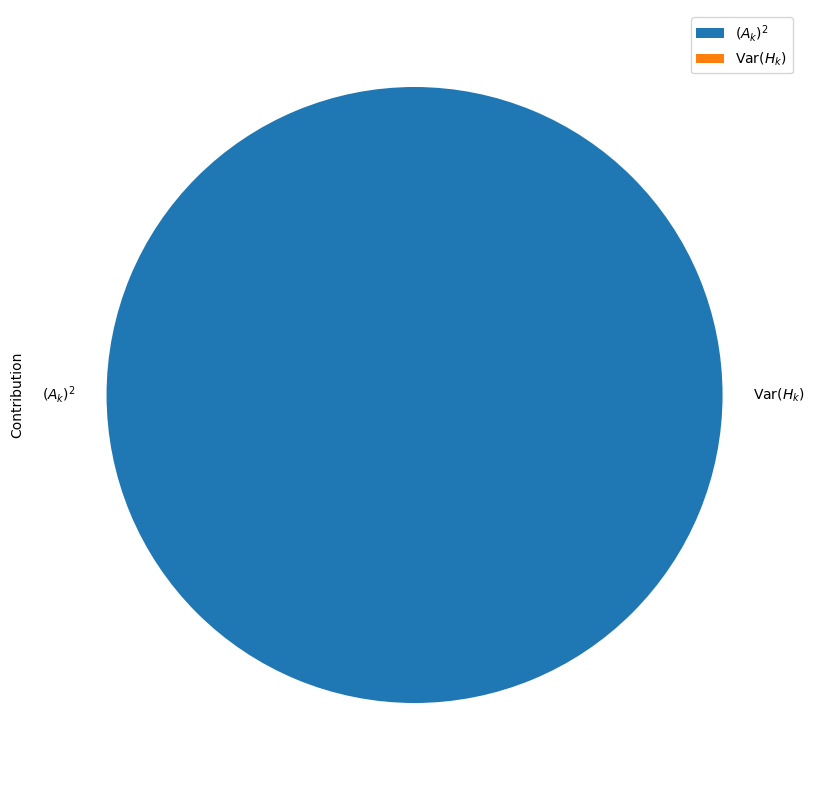

In [8]:
data = [[r'$\left(A_k\right)^2$', np.sum(E_A**2)], 
        [r'Var$\left(H_k\right)$',np.sum(var_H)], ]
data = pd.DataFrame(data, columns=['Name', 'Contribution'],index = [
    r'$\left(A_k\right)^2$',
    r'Var$\left(H_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
])

data.plot.pie(y = 'Contribution',figsize=(13, 10))

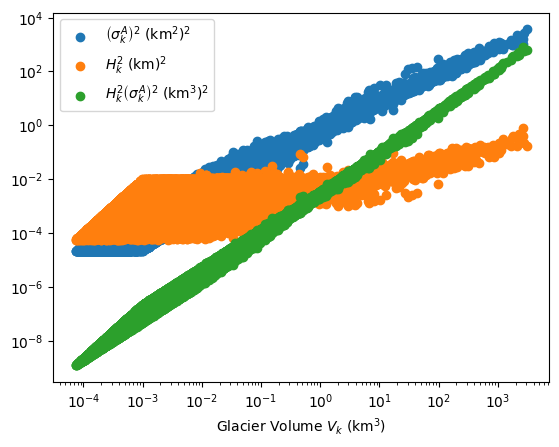

In [9]:
plt.scatter(E_H*E_A,var_A,label = r'$\left(\sigma^A_k\right)^2$ (km$^2$)$^2$')
plt.scatter(E_H*E_A,E_H**2,label = r'$H_k^2$ (km)$^2$')
plt.scatter(E_H*E_A,(E_H**2*var_A),
            label = r'$H_k^2\left(\sigma^A_k\right)^2$ (km$^3$)$^2$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Glacier Volume $V_k$ (km$^3$)')
# plt.ylabel('(km$^3$)$^2$')
plt.legend()
plt.show()



<Axes: ylabel='Contribution'>

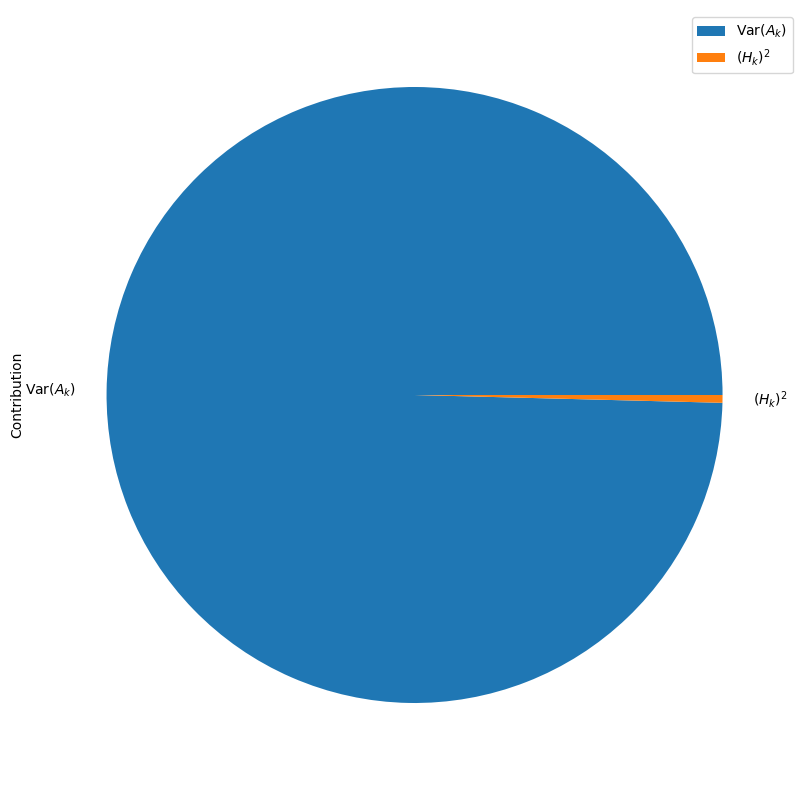

In [10]:
data = [[r'Var$\left(A_k\right)$', np.sum(var_A)], 
        [r'$\left(H_k\right)^2$',np.sum(E_H**2)], ]
data = pd.DataFrame(data, columns=['Name', 'Contribution'],index = [
    r'Var$\left(A_k\right)$',
    r'$\left(H_k\right)^2$',
#     r'Var$\left(\epsilon^M_k\right)$'
])

data.plot.pie(y = 'Contribution',figsize=(13, 10))

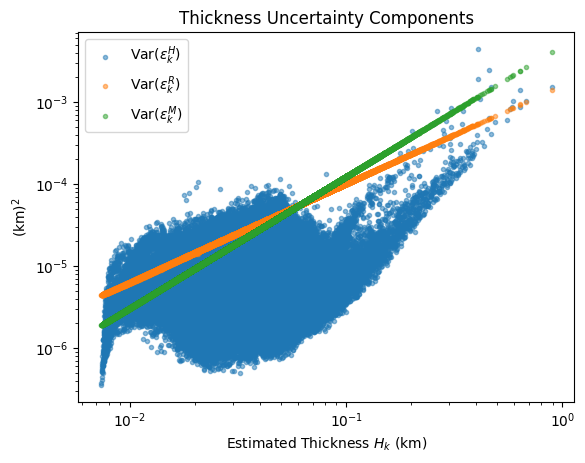

In [11]:
plt.scatter(np.mean(df[cols],axis = 1),var_eps_H,marker = '.',alpha = 0.5,
           label = r'Var($\epsilon^H_k$)'
           )
plt.scatter(np.mean(df[cols],axis = 1),var_eps_R,marker = '.',alpha = 0.5,
           label = r'Var($\epsilon^R_k$)')
plt.scatter(np.mean(df[cols],axis = 1),var_eps_M,marker = '.',alpha = 0.5,
           label = r'Var($\epsilon^M_k$)')
# plt.scatter(np.mean(df[cols],axis = 1),var_H    ,marker = '.',alpha = 0.25,
#            label = r'Var($H_k$)'
#            )
plt.ylabel(r'(km)$^2$')
plt.xlabel(r'Estimated Thickness $H_k$ (km)')
plt.title('Thickness Uncertainty Components')
plt.xscale('log')
plt.yscale('log')
plt.legend()

<Axes: ylabel='Contribution to Var($H_k$)'>

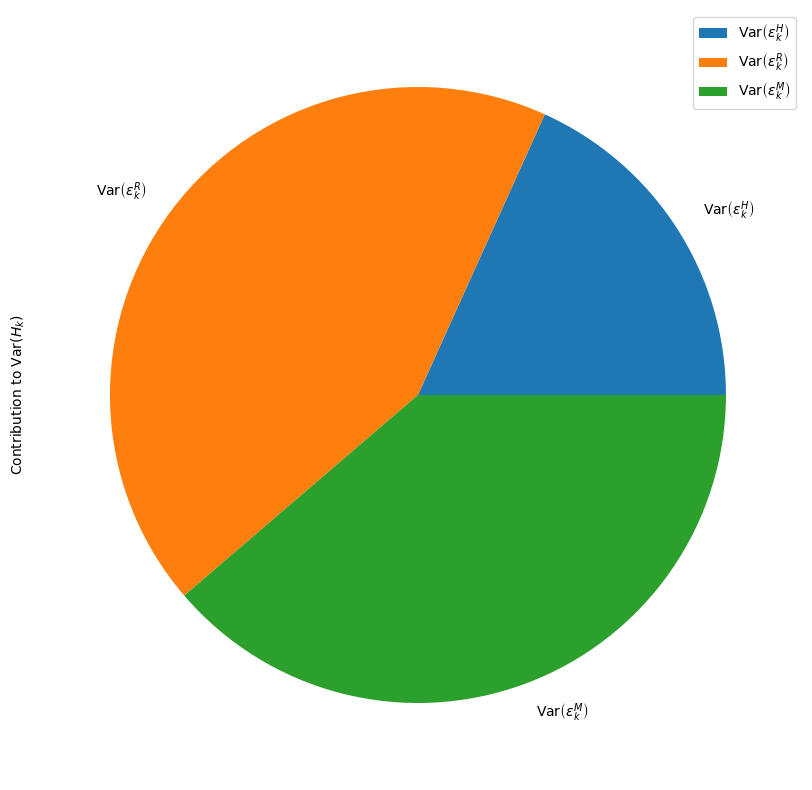

In [12]:
data = [[r'Var$\left(\epsilon^H_k\right)$', np.sum(var_eps_H)], 
        [r'Var$\left(\epsilon^R_k\right)$',np.sum(var_eps_R)], 
        [r'Var$\left(\epsilon^M_k\right)$', np.sum(var_eps_M)]]
data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
    r'Var$\left(\epsilon^H_k\right)$',
    r'Var$\left(\epsilon^R_k\right)$',
    r'Var$\left(\epsilon^M_k\right)$'
])

data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10))

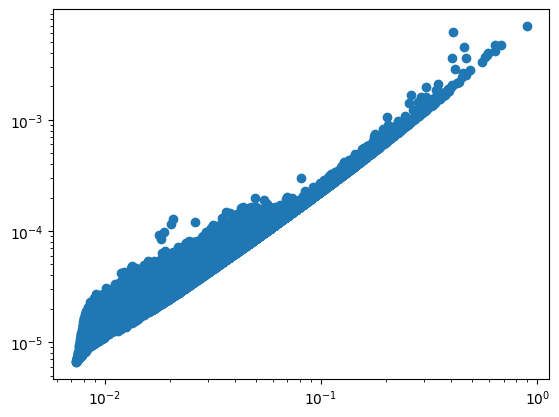

In [13]:
plt.scatter(E_H,var_H)
plt.xscale('log')
plt.yscale('log')